In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# imports for scaling and splitting data
from sklearn.preprocessing import StandardScaler

# imports for results visualization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV 
import seaborn as sns
import matplotlib.pyplot as plt

# Global variables

In [2]:
# shortlist if true will only run, knn ann nb otherwise all models will be run
short_list = True
# standard scaler
std_scaler = StandardScaler()

In [3]:
# file paths to mex on Colab
data_file = "sample_data/mex.csv"

In [4]:
# read all data
data = pd.read_csv(data_file, header=None)
seed =100 #useful for random generators
print(data.shape)


(6313, 874)


# Accessing different parts of the collected data

In [5]:
# extract class labels from data
y = data.iloc[:, 873]
print(y.shape)



(6313,)


In [6]:
#extract person IDs
id = data.iloc[:, 0]
print(id.shape)


(6313,)


In [7]:
# extract features from wrist accelerometer data
acw_x = data.iloc[:, 1:181]
print(acw_x.shape)

# standard scaler
acw_x_std = pd.DataFrame(std_scaler.fit_transform(acw_x))
print(acw_x_std.head())




(6313, 180)
        0         1         2         3         4         5         6    \
0  1.570822 -0.606105 -0.545214 -0.567535 -0.583643 -0.510801 -0.514511   
1  1.568518 -0.558339 -0.635455 -0.609960 -0.405455 -0.556832 -0.478476   
2  1.562392 -0.608683 -0.649659 -0.529207 -0.552633 -0.427658 -0.505032   
3  1.525284 -0.329008 -0.428188 -0.500845 -0.464781 -0.474847 -0.479369   
4  1.470394 -0.337318 -0.454094 -0.585985 -0.413694 -0.564471 -0.443044   

        7         8         9    ...       170       171       172       173  \
0 -0.515030 -0.456289 -0.365966  ... -0.401797 -0.343222 -0.322133 -0.315246   
1 -0.489836 -0.483460 -0.473175  ... -0.448168 -0.261374 -0.341414 -0.218815   
2 -0.497296 -0.480918 -0.429061  ... -0.240799 -0.448485 -0.357186 -0.068454   
3 -0.413896 -0.441954 -0.400428  ... -0.310292 -0.180566 -0.323165 -0.346335   
4 -0.496684 -0.374821 -0.455551  ... -0.454730 -0.314492 -0.367541 -0.284978   

        174       175       176       177       178     

In [8]:
# extract features from thigh accelerometer data
act_x = data.iloc[:, 181:361]
print(act_x.shape)

# standard scaler
act_x_std = pd.DataFrame(std_scaler.fit_transform(act_x))
print(act_x_std.head())


(6313, 180)
        0         1         2         3         4         5         6    \
0  0.232013 -0.219166 -0.570326  0.567336 -0.449344  0.491671 -0.104109   
1  0.262948 -0.382942 -0.410501  0.785552 -0.573946 -0.301154 -0.279240   
2  0.154318 -0.587960 -0.119088  0.633877 -0.020377  0.012294 -0.547828   
3  0.233592 -0.560385  0.202102  0.254719  0.023642 -0.135439 -0.406348   
4  0.157150 -0.414837  0.239839 -0.160751  0.169072 -0.501084  0.644300   

        7         8         9    ...       170       171       172       173  \
0 -0.557729  0.952593 -0.043184  ...  0.371373  0.298846 -0.004799 -0.204393   
1 -0.282902  2.067171  1.585547  ... -0.058335  0.847841 -0.031508 -0.061945   
2 -0.110477  2.745026  0.948965  ... -0.410137  0.959579  0.171824  0.371645   
3  1.596799 -0.105832  1.171094  ...  0.263874 -0.406942 -0.138108 -0.155861   
4  0.558064  2.191333  2.094155  ...  0.395289 -0.648194 -0.075533 -0.618318   

        174       175       176       177       178     

In [9]:
# extract features from pressure mat data
pm_x = data.iloc[:, 361:873]
print(pm_x.shape)

# standard scaler
pm_x_std = pd.DataFrame(std_scaler.fit_transform(pm_x))
print(pm_x_std.head())

(6313, 512)
        0         1         2         3         4         5         6    \
0 -0.462956 -0.154266 -0.213578 -0.159938 -0.290723 -0.137551 -0.227481   
1 -0.462956 -0.154266 -0.213578 -0.159938 -0.290723 -0.137551 -0.227481   
2 -0.366417 -0.154266 -0.213578 -0.159938  0.014899 -0.137551 -0.227481   
3 -0.366417 -0.154266 -0.213578 -0.159938  0.014899 -0.137551 -0.227481   
4 -0.340088 -0.154266 -0.213578 -0.159938  0.035724 -0.137551 -0.227481   

        7         8         9    ...       502       503       504       505  \
0 -0.147788 -0.093664 -0.061955  ... -0.282976 -0.337510 -0.359278 -0.312412   
1 -0.147788 -0.093664 -0.061955  ... -0.282976 -0.344634 -0.360164 -0.312621   
2 -0.147788 -0.093664 -0.061955  ... -0.282971 -0.343032 -0.361864 -0.311738   
3 -0.147788 -0.093664 -0.061955  ... -0.283127 -0.348838 -0.364918 -0.312159   
4 -0.147788 -0.093664 -0.061955  ... -0.282815 -0.339013 -0.363301 -0.310261   

        506       507       508       509       510     

In [10]:
# extract wrist and thigh accelerometer data
wt_x = data.iloc[:, 1:361]
print(wt_x.shape)

# standard scaler
wt_x_std = pd.DataFrame(std_scaler.fit_transform(wt_x))
print(wt_x_std.head())

(6313, 360)
        0         1         2         3         4         5         6    \
0  1.570822 -0.606105 -0.545214 -0.567535 -0.583643 -0.510801 -0.514511   
1  1.568518 -0.558339 -0.635455 -0.609960 -0.405455 -0.556832 -0.478476   
2  1.562392 -0.608683 -0.649659 -0.529207 -0.552633 -0.427658 -0.505032   
3  1.525284 -0.329008 -0.428188 -0.500845 -0.464781 -0.474847 -0.479369   
4  1.470394 -0.337318 -0.454094 -0.585985 -0.413694 -0.564471 -0.443044   

        7         8         9    ...       350       351       352       353  \
0 -0.515030 -0.456289 -0.365966  ...  0.371373  0.298846 -0.004799 -0.204393   
1 -0.489836 -0.483460 -0.473175  ... -0.058335  0.847841 -0.031508 -0.061945   
2 -0.497296 -0.480918 -0.429061  ... -0.410137  0.959579  0.171824  0.371645   
3 -0.413896 -0.441954 -0.400428  ...  0.263874 -0.406942 -0.138108 -0.155861   
4 -0.496684 -0.374821 -0.455551  ...  0.395289 -0.648194 -0.075533 -0.618318   

        354       355       356       357       358     

In [11]:
# extract wrist, thigh and pressure mat data
wtp_x = data.iloc[:, 1:873]
print(wtp_x.shape)

# standard scaler
wtp_x_std = pd.DataFrame(std_scaler.fit_transform(wtp_x))
print(wtp_x_std.head())

(6313, 872)
        0         1         2         3         4         5         6    \
0  1.570822 -0.606105 -0.545214 -0.567535 -0.583643 -0.510801 -0.514511   
1  1.568518 -0.558339 -0.635455 -0.609960 -0.405455 -0.556832 -0.478476   
2  1.562392 -0.608683 -0.649659 -0.529207 -0.552633 -0.427658 -0.505032   
3  1.525284 -0.329008 -0.428188 -0.500845 -0.464781 -0.474847 -0.479369   
4  1.470394 -0.337318 -0.454094 -0.585985 -0.413694 -0.564471 -0.443044   

        7         8         9    ...       862       863       864       865  \
0 -0.515030 -0.456289 -0.365966  ... -0.282976 -0.337510 -0.359278 -0.312412   
1 -0.489836 -0.483460 -0.473175  ... -0.282976 -0.344634 -0.360164 -0.312621   
2 -0.497296 -0.480918 -0.429061  ... -0.282971 -0.343032 -0.361864 -0.311738   
3 -0.413896 -0.441954 -0.400428  ... -0.283127 -0.348838 -0.364918 -0.312159   
4 -0.496684 -0.374821 -0.455551  ... -0.282815 -0.339013 -0.363301 -0.310261   

        866       867       868       869       870     

In [12]:
# a few examples of models - keras learners can also be explored
models = []
models.append(('LR', LogisticRegression(max_iter=200, solver='liblinear', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', gamma=0.7, C=1.0)))
models.append(('ANN', MLPClassifier(max_iter=2048, random_state=seed)))

# shortlist of models to be used knn, ann, nb
if short_list:
    models = []
    models.append(('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance')))
    models.append(('NB', GaussianNB()))
    models.append(('CART', DecisionTreeClassifier()))

# 2.1 Evaluate the role of sensors on classification

## Helper methods

In [13]:
# evaluate each model in turn
target_names = ['Knee roll (Ab)', 'Bridging (Glut)', 'Pelvic tilt (Pain relief)', 'Bilateral Clam (Glut)', 'Extension in Lying (Flexibility)',
                'Prone punches (core)', 'Superman (Back)']

def evaluate_models_for_sensors(X, y, models):
    over_all_results = []
    all_clf_report = []
    for name, model in models:
        print (name, ' Staring...')
        # split data into train and test sets with stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
        # fit the model
        model.fit(X_train, y_train)
        # predict on test set
        y_pred = model.predict(X_test)
        # evaluate predictions
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
        recall = recall_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
        f1 = f1_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
        clf_report = classification_report(y_test, y_pred, labels=np.unique(y_pred), target_names=target_names,
                                   output_dict=True)
        # results data
        print (name, ' Successfully')
        over_all_results.append([name, accuracy, precision ,recall, f1])
        all_clf_report.append([name, clf_report])
    return over_all_results, all_clf_report

# plot overall results for accuracy, recall and f1 in bar chart
def plot_overall_results(results, title):
    # convert results to dataframe
    plot_data = pd.DataFrame(results, columns=['Model', 'Accuracy',"Precision macro average", 'Recall macro average', 'F1 macro average'])
    print(plot_data)
    # plot grouped bar chart
    plot_data.plot(x='Model', kind='bar', ylim=(0, 1.), figsize=(10, 6), legend=True, fontsize=12,
                    title=title, rot=0, grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    )
    plt.show()

def plot_classification_report_heatmap(clf_reports, title):
    # plot classification report heatmaps
    for name, clf_report in clf_reports:
        print(name)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, vmin=0, vmax=1.)
        plt.title(name + ' ' + title)
        plt.show()

## Evaluations of sensors

### Wrist accelerometer Evaluation

In [14]:
print('Running algorithms for wrist accelerometer data...')
results, clf_report = evaluate_models_for_sensors(acw_x_std, y, models)

Running algorithms for wrist accelerometer data...
KNN  Staring...
KNN  Successfully
NB  Staring...
NB  Successfully
CART  Staring...
CART  Successfully


  Model  Accuracy  Precision macro average  Recall macro average  \
0   KNN  0.772763                 0.781424              0.772850   
1    NB  0.403009                 0.464887              0.409970   
2  CART  0.685669                 0.689836              0.686242   

   F1 macro average  
0          0.774106  
1          0.375596  
2          0.687138  


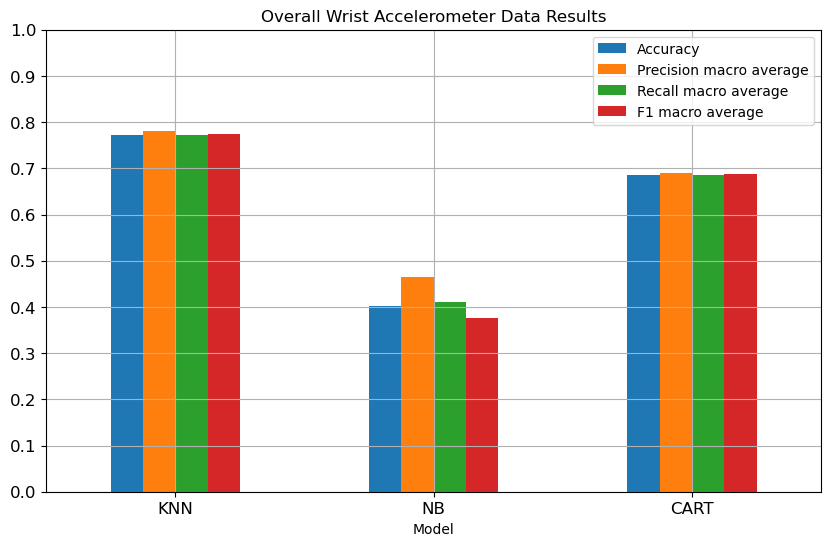

KNN


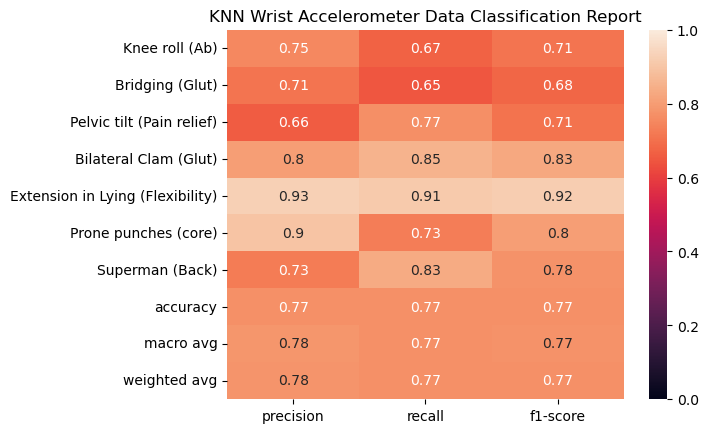

NB


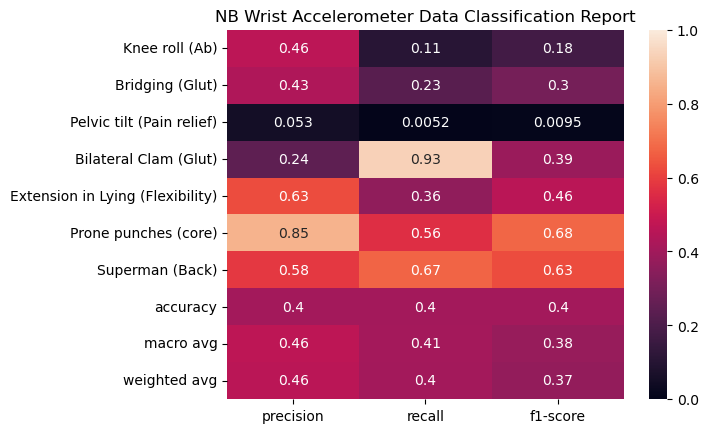

CART


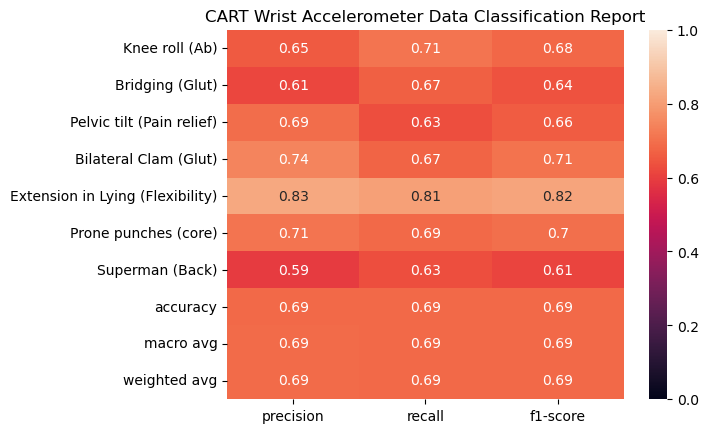

In [15]:
plot_overall_results(results, 'Overall Wrist Accelerometer Data Results')
plot_classification_report_heatmap(clf_report, 'Wrist Accelerometer Data Classification Report')

### Thigh accelerometer evaluation

In [16]:
print('Running algorithms for thigh accelerometer data...')
# complete code here
results, clf_report = evaluate_models_for_sensors(act_x_std, y, models)


Running algorithms for thigh accelerometer data...
KNN  Staring...
KNN  Successfully
NB  Staring...
NB  Successfully
CART  Staring...
CART  Successfully


  Model  Accuracy  Precision macro average  Recall macro average  \
0   KNN  0.849565                 0.863021              0.850575   
1    NB  0.631037                 0.711743              0.629198   
2  CART  0.872526                 0.875919              0.872016   

   F1 macro average  
0          0.851741  
1          0.630368  
2          0.873194  


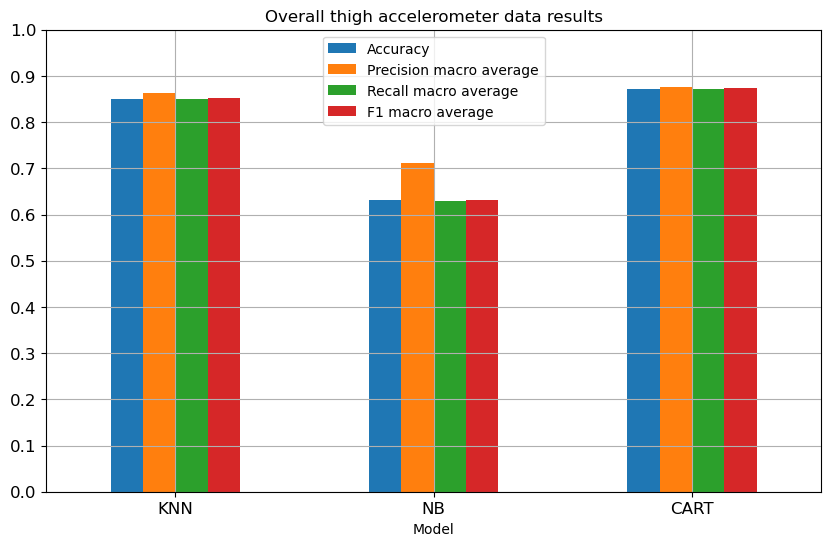

KNN


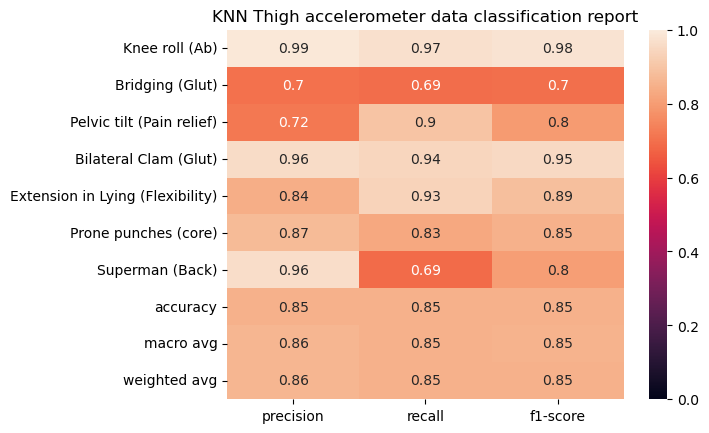

NB


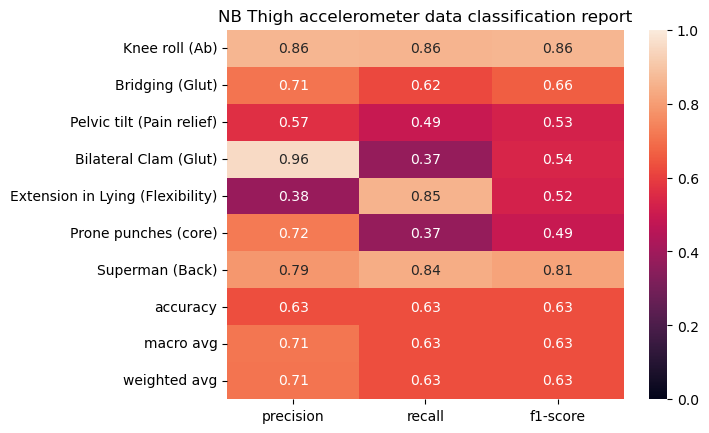

CART


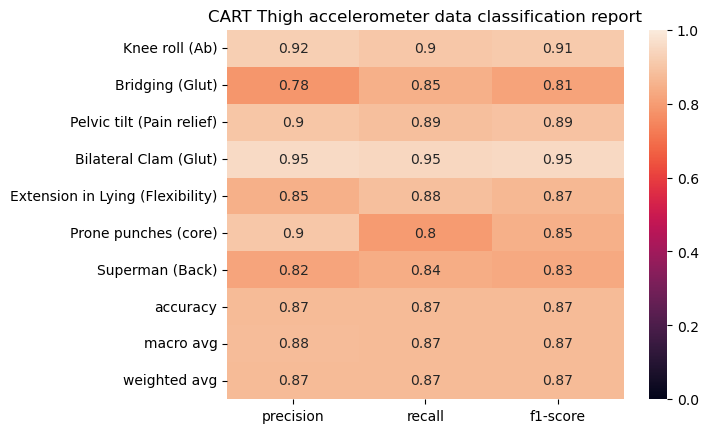

In [17]:
plot_overall_results(results, 'Overall thigh accelerometer data results')
plot_classification_report_heatmap(clf_report, 'Thigh accelerometer data classification report')

### Pressure mat data evaluation

In [18]:
print('Running algorithms for pressure mat data...')
# complete code here
results, clf_report = evaluate_models_for_sensors(pm_x_std, y, models)

Running algorithms for pressure mat data...
KNN  Staring...
KNN  Successfully
NB  Staring...
NB  Successfully
CART  Staring...
CART  Successfully


  Model  Accuracy  Precision macro average  Recall macro average  \
0   KNN  0.982581                 0.982028              0.982067   
1    NB  0.790182                 0.838911              0.791950   
2  CART  0.935075                 0.935063              0.934697   

   F1 macro average  
0          0.982035  
1          0.782359  
2          0.934826  


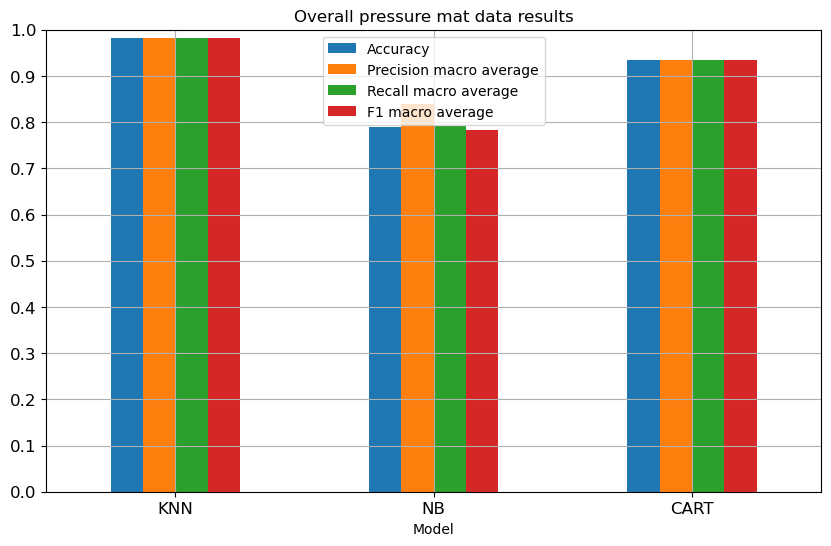

KNN


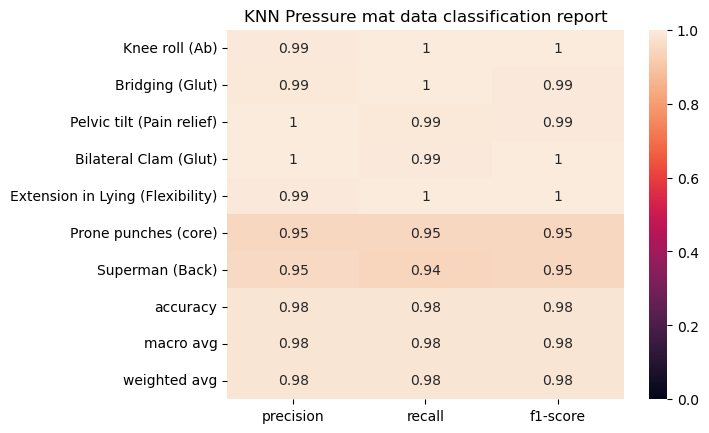

NB


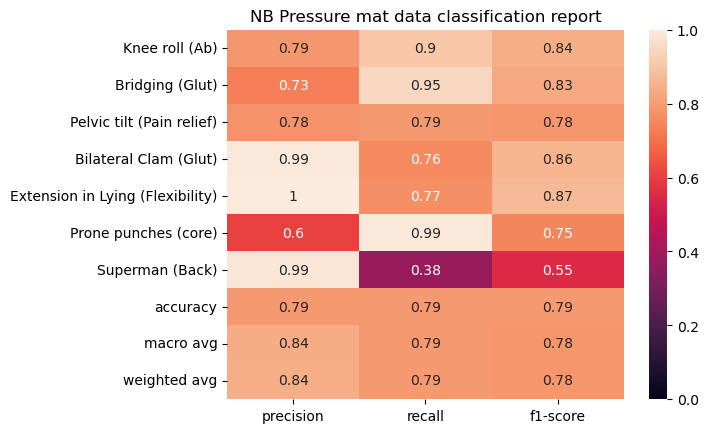

CART


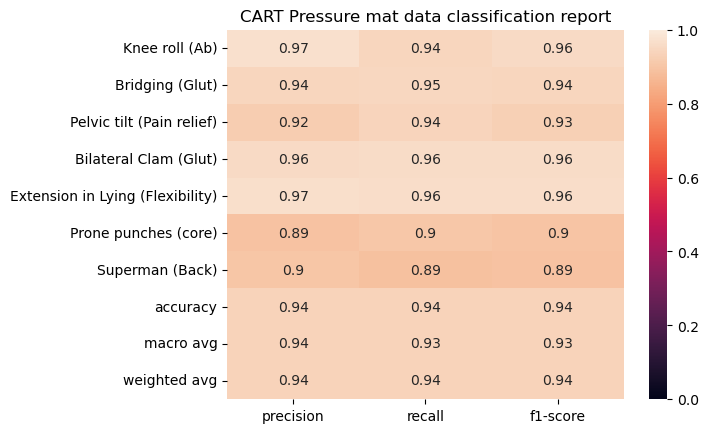

In [19]:
plot_overall_results(results, 'Overall pressure mat data results')
plot_classification_report_heatmap(clf_report, 'Pressure mat data classification report')

### Wrist and thigh accelerometer data evaluation

In [20]:
print('Running algorithms for wrist and thigh accelerometer data...')
# complete code here
results, clf_report = evaluate_models_for_sensors(wt_x_std, y, models)

Running algorithms for wrist and thigh accelerometer data...
KNN  Staring...
KNN  Successfully
NB  Staring...
NB  Successfully
CART  Staring...
CART  Successfully


  Model  Accuracy  Precision macro average  Recall macro average  \
0   KNN  0.928741                 0.935270              0.930515   
1    NB  0.763262                 0.803360              0.764619   
2  CART  0.920032                 0.921249              0.921117   

   F1 macro average  
0          0.929741  
1          0.770548  
2          0.921068  


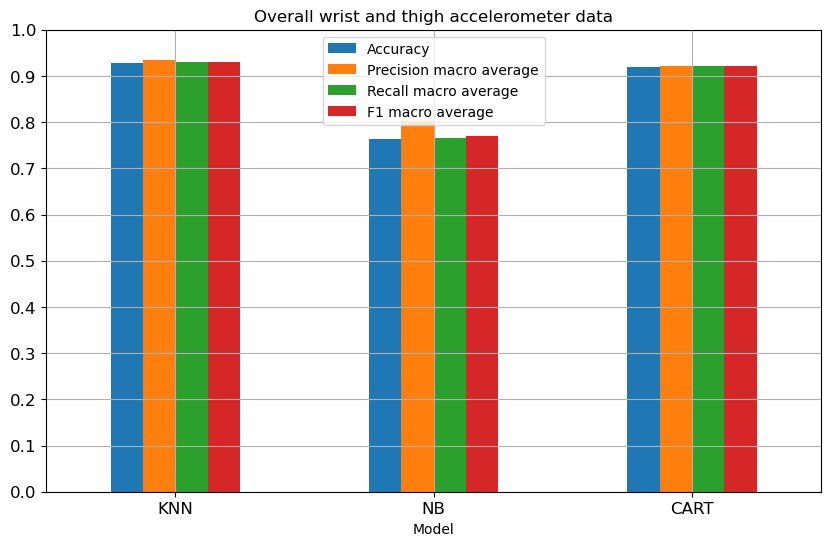

KNN


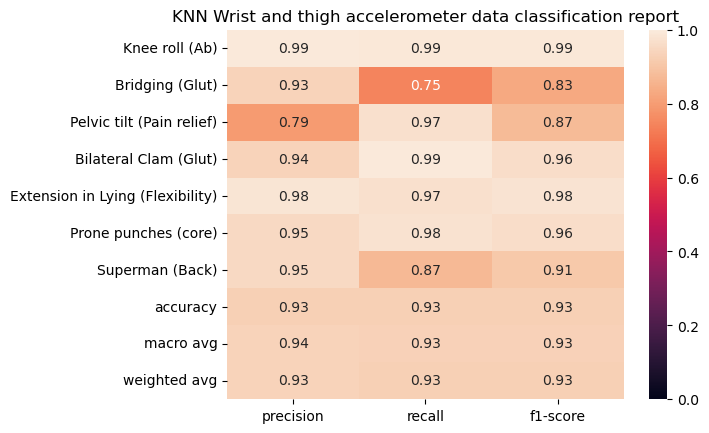

NB


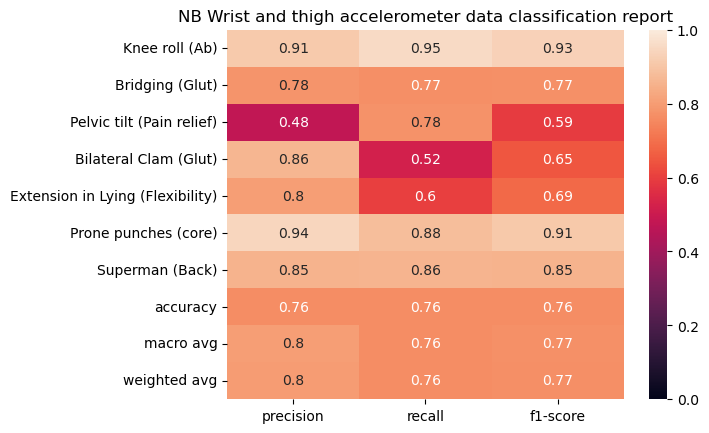

CART


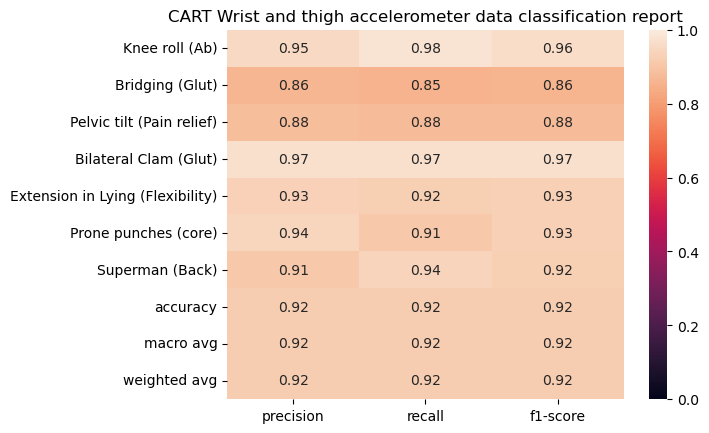

In [21]:
plot_overall_results(results, 'Overall wrist and thigh accelerometer data')
plot_classification_report_heatmap(clf_report, 'Wrist and thigh accelerometer data classification report')

### Wrist and thigh accelerometer data and pressure mat data evaluation

In [22]:
print('Running algorithms for wrist and thigh accelerometer data and pressure mat data...')
# complete code here
results, clf_report = evaluate_models_for_sensors(wtp_x_std, y, models)

Running algorithms for wrist and thigh accelerometer data and pressure mat data...
KNN  Staring...
KNN  Successfully
NB  Staring...
NB  Successfully
CART  Staring...
CART  Successfully


  Model  Accuracy  Precision macro average  Recall macro average  \
0   KNN  0.985748                 0.985717              0.985770   
1    NB  0.896279                 0.907898              0.897517   
2  CART  0.960412                 0.961828              0.960231   

   F1 macro average  
0          0.985722  
1          0.897893  
2          0.960695  


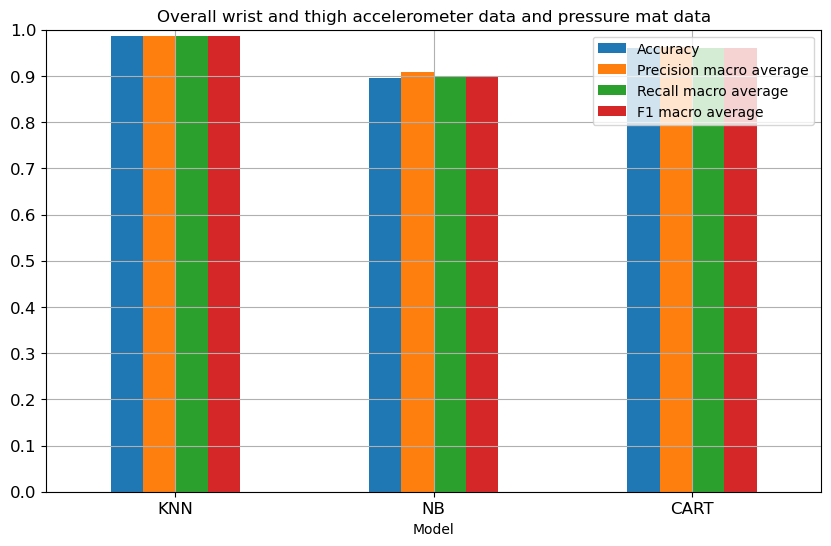

KNN


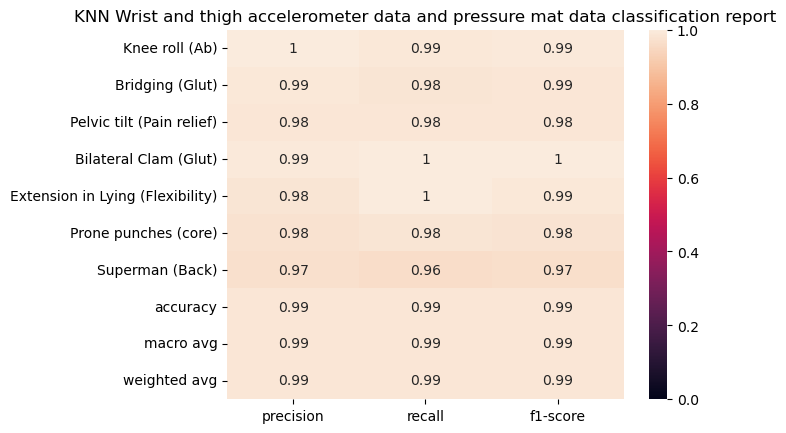

NB


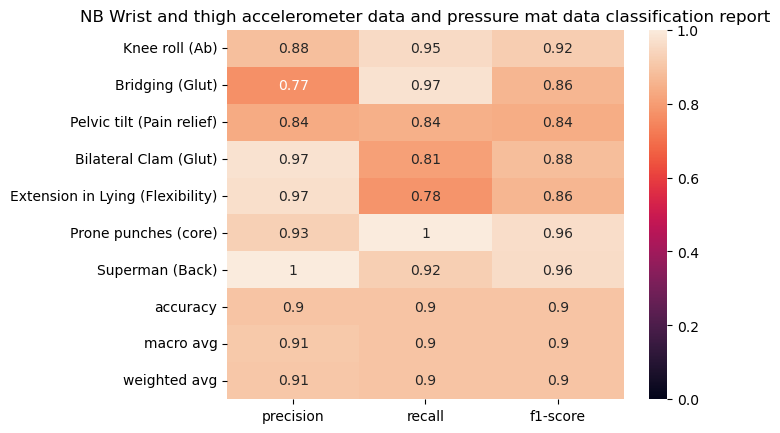

CART


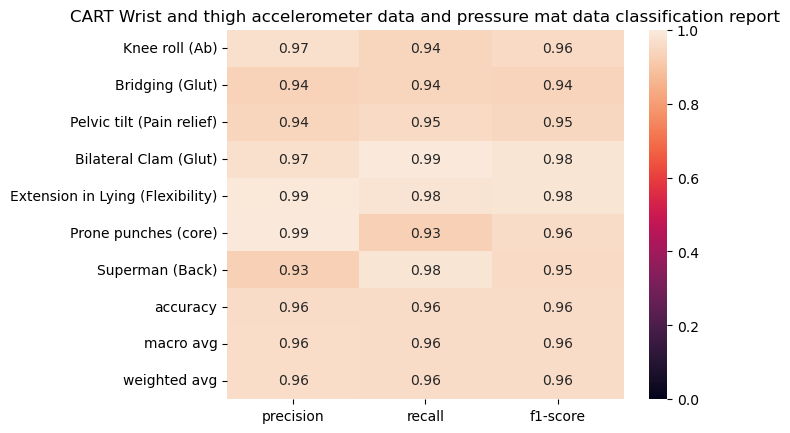

In [23]:
plot_overall_results(results, 'Overall wrist and thigh accelerometer data and pressure mat data')
plot_classification_report_heatmap(clf_report, 'Wrist and thigh accelerometer data and pressure mat data classification report')

# 2.2 Evaluate the role of persons data on classification

In [24]:
#print all unique person Ids
data[0].unique()

array([30, 22, 24, 25, 26,  1,  6,  7,  4, 23,  8,  9, 28, 29,  2,  3, 27,
       20, 21, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18,  5], dtype=int64)

## Helper methods

In [25]:
# dictionary of MEx Exercises and their corresponding indices in the data
Sensors_indices = []
Sensors_indices.append(('Wrist Accelerometer', [1, 181]))
Sensors_indices.append(('Thigh Accelerometer', [181, 361]))
Sensors_indices.append(('Pressure Mat', [361, 873]))
Sensors_indices.append(('Wrist and Thigh Accelerometer', [1, 361]))
Sensors_indices.append(('Wrist, Thigh Accelerometer and Pressure Mat', [1, 873]))
print(Sensors_indices[0][1])

#helper function to split data by Leave-One-Person-Out
def lopo_split(df, indices=[], test_person=None):
    if test_person == None:
        print("Need test person id")
        return
    if len(indices) == 0 | len(indices)>2 | indices[0]<1 | indices[1]>872 | indices[0]>indices[1]:
        print("Need valid indices")
        return

    train_df = df[df[0]!=test_person]
    test_df = df[df[0]==test_person]
    # add standard scaler here
    X_train = train_df.iloc[:, indices[0]:indices[1]].to_numpy()
    X_train = pd.DataFrame(std_scaler.fit_transform(X_train))
    # add standard scaler here
    X_test = test_df.iloc[:, indices[0]:indices[1]].to_numpy()
    X_test = pd.DataFrame(std_scaler.fit_transform(X_test))
                          
    y_train = train_df.iloc[:, 873].to_numpy()
    y_test = test_df.iloc[:, 873].to_numpy()

    return X_train, X_test, y_train, y_test

def evaluate_models_for_persons_data(data, models, indices):
    print("Running algorithms for Leave-One-Person-Out on ", indices[0] ," data...")
    models_results = []
    # evaluate each model in turn
    for name, model in models:
        print (name, ' Staring...')
        # split data into train and test sets
        for person_id in np.unique(id):
            print("Testing for person id: ", person_id)
            # split data into train and test sets
            X_train, X_test, y_train, y_test = lopo_split(data, indices[1], test_person=person_id)
            # fit the model
            model.fit(X_train, y_train)
            # predict on test set
            y_pred = model.predict(X_test)
            # evaluate predictions
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
            recall = recall_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
            f1 = f1_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
            #clf_report = classification_report(y_test, y_pred, labels=np.unique(y_pred), target_names=target_names, output_dict=True)
        # results data
        print (name, ' Successfully')
        # get average results for all leave-one-person-out iterations for each model
        models_results.append([name, np.mean(accuracy), np.mean(precision) ,np.mean(recall), np.mean(f1)])
    return models_results

# plot overall results for mean accuracy, recall and f1 in bar chart for Leave-One-Person-Out
def plot_overall_results(results, title):
    # convert results to dataframe
    plot_data = pd.DataFrame(results, columns=['Model', 'Mean Accuracy',"Mean Precision macro average", 'Mean Recall macro average', 'Mean F1 macro average'])
    print(plot_data)
    # plot grouped bar chart
    plot_data.plot(x='Model', kind='bar', ylim=(0, 1.), figsize=(10, 6), legend=True, fontsize=12,
                    title=title, rot=0, grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    )
    plt.show()


[1, 181]


In [26]:
#testing helper method
#indicies indicate the sensor or sensors needed
X_train, X_test, y_train, y_test = lopo_split(data, indices=[1, 181], test_person=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6087, 180)
(226, 180)
(6087,)
(226,)


## Evaluate the role of persons

### Wrist accelerometer data

In [27]:
print('Running algorithms for wrist accelerometer data...')
# complete code here
wa_lopo_results = evaluate_models_for_persons_data(data, models, Sensors_indices[0])

Running algorithms for wrist accelerometer data...
Running algorithms for Leave-One-Person-Out on  Wrist Accelerometer  data...
KNN  Staring...
Testing for person id:  1
Testing for person id:  2


Testing for person id:  3
Testing for person id:  4
Testing for person id:  5
Testing for person id:  6
Testing for person id:  7
Testing for person id:  8
Testing for person id:  9
Testing for person id:  10
Testing for person id:  11
Testing for person id:  12
Testing for person id:  13
Testing for person id:  14
Testing for person id:  15
Testing for person id:  16
Testing for person id:  17
Testing for person id:  18
Testing for person id:  19
Testing for person id:  20
Testing for person id:  21
Testing for person id:  22
Testing for person id:  23
Testing for person id:  24
Testing for person id:  25
Testing for person id:  26
Testing for person id:  27
Testing for person id:  28
Testing for person id:  29
Testing for person id:  30
KNN  Successfully
NB  Staring...
Testing for person id:  1
Testing for person id:  2
Testing for person id:  3
Testing for person id:  4
Testing for person id:  5
Testing for person id:  6
Testing for person id:  7
Testing for person id:  8
Testing fo

  Model  Mean Accuracy  Mean Precision macro average  \
0   KNN       0.555556                      0.642999   
1    NB       0.459596                      0.510200   
2  CART       0.388889                      0.364849   

   Mean Recall macro average  Mean F1 macro average  
0                   0.648436               0.590823  
1                   0.544089               0.480404  
2                   0.394023               0.362721  


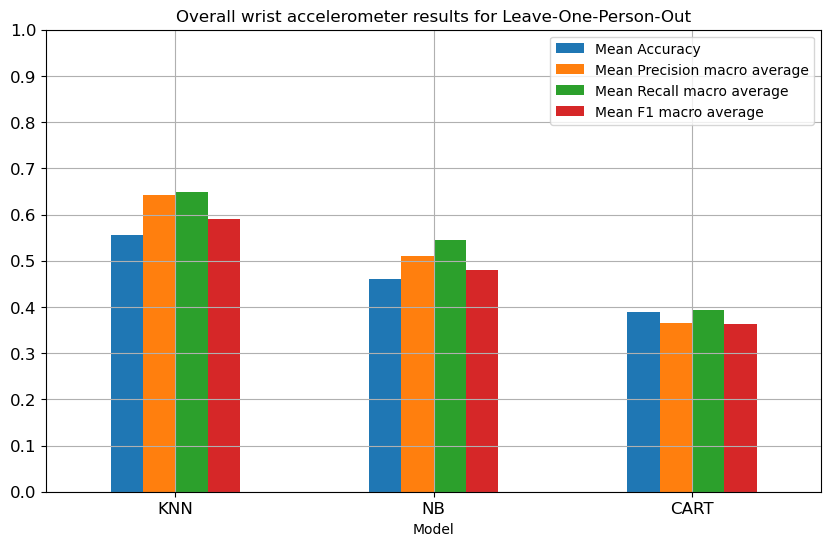

In [28]:
plot_overall_results(wa_lopo_results, 'Overall wrist accelerometer results for Leave-One-Person-Out')

### Thigh accelerometer data

In [29]:
print('Running algorithms for thigh accelerometer data...')

# complete code here
ta_lopo_results = evaluate_models_for_persons_data(data, models, Sensors_indices[1])

Running algorithms for thigh accelerometer data...
Running algorithms for Leave-One-Person-Out on  Thigh Accelerometer  data...
KNN  Staring...
Testing for person id:  1
Testing for person id:  2
Testing for person id:  3
Testing for person id:  4
Testing for person id:  5
Testing for person id:  6
Testing for person id:  7
Testing for person id:  8
Testing for person id:  9
Testing for person id:  10
Testing for person id:  11
Testing for person id:  12
Testing for person id:  13
Testing for person id:  14
Testing for person id:  15
Testing for person id:  16
Testing for person id:  17
Testing for person id:  18
Testing for person id:  19
Testing for person id:  20
Testing for person id:  21
Testing for person id:  22
Testing for person id:  23
Testing for person id:  24
Testing for person id:  25
Testing for person id:  26
Testing for person id:  27
Testing for person id:  28
Testing for person id:  29
Testing for person id:  30
KNN  Successfully
NB  Staring...
Testing for person id:

  Model  Mean Accuracy  Mean Precision macro average  \
0   KNN       0.631313                      0.593706   
1    NB       0.712121                      0.645844   
2  CART       0.606061                      0.546438   

   Mean Recall macro average  Mean F1 macro average  
0                   0.633493               0.595695  
1                   0.699596               0.648842  
2                   0.618200               0.576940  


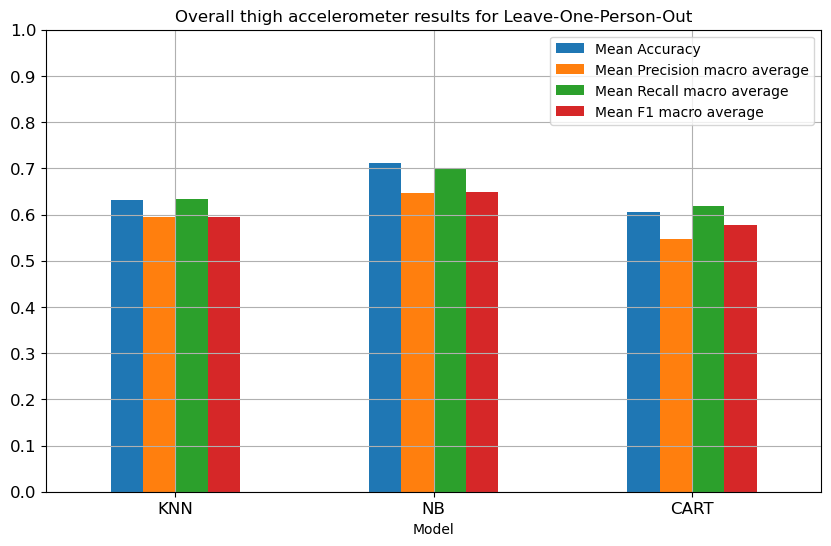

In [30]:
plot_overall_results(ta_lopo_results, 'Overall thigh accelerometer results for Leave-One-Person-Out')

### Pressure mat data

In [31]:
print('Running algorithms for pressure mat data...')

# complete code here
pm_lopo_results = evaluate_models_for_persons_data(data, models, Sensors_indices[2])

Running algorithms for pressure mat data...
Running algorithms for Leave-One-Person-Out on  Pressure Mat  data...
KNN  Staring...
Testing for person id:  1
Testing for person id:  2
Testing for person id:  3
Testing for person id:  4
Testing for person id:  5
Testing for person id:  6
Testing for person id:  7
Testing for person id:  8
Testing for person id:  9
Testing for person id:  10
Testing for person id:  11
Testing for person id:  12
Testing for person id:  13
Testing for person id:  14
Testing for person id:  15
Testing for person id:  16
Testing for person id:  17
Testing for person id:  18
Testing for person id:  19
Testing for person id:  20
Testing for person id:  21
Testing for person id:  22
Testing for person id:  23
Testing for person id:  24
Testing for person id:  25
Testing for person id:  26
Testing for person id:  27
Testing for person id:  28
Testing for person id:  29
Testing for person id:  30
KNN  Successfully
NB  Staring...
Testing for person id:  1
Testing fo

  Model  Mean Accuracy  Mean Precision macro average  \
0   KNN       0.696970                      0.722432   
1    NB       0.136364                      0.136364   
2  CART       0.606061                      0.643221   

   Mean Recall macro average  Mean F1 macro average  
0                   0.696813               0.693194  
1                   1.000000               0.240000  
2                   0.610180               0.584337  


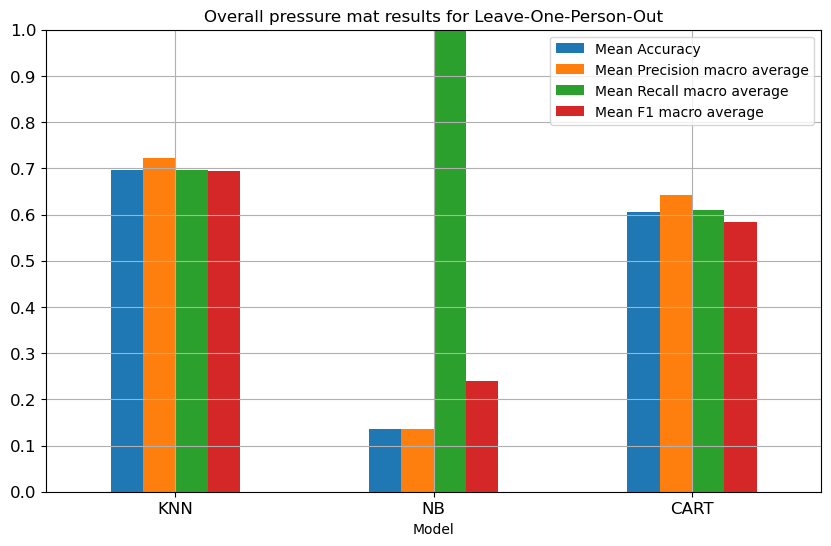

In [32]:
plot_overall_results(pm_lopo_results, 'Overall pressure mat results for Leave-One-Person-Out')

### Wrist and thigh accelerometer data and pressure mat data

In [33]:
print('Running algorithms for wrist and thigh accelerometer data and pressure mat data...')

# complete code here
wtp_lopo_results = evaluate_models_for_persons_data(data, models, Sensors_indices[4])

Running algorithms for wrist and thigh accelerometer data and pressure mat data...
Running algorithms for Leave-One-Person-Out on  Wrist, Thigh Accelerometer and Pressure Mat  data...
KNN  Staring...
Testing for person id:  1
Testing for person id:  2
Testing for person id:  3
Testing for person id:  4
Testing for person id:  5
Testing for person id:  6
Testing for person id:  7
Testing for person id:  8
Testing for person id:  9
Testing for person id:  10
Testing for person id:  11
Testing for person id:  12
Testing for person id:  13
Testing for person id:  14
Testing for person id:  15
Testing for person id:  16
Testing for person id:  17
Testing for person id:  18
Testing for person id:  19
Testing for person id:  20
Testing for person id:  21
Testing for person id:  22
Testing for person id:  23
Testing for person id:  24
Testing for person id:  25
Testing for person id:  26
Testing for person id:  27
Testing for person id:  28
Testing for person id:  29
Testing for person id:  30

  Model  Mean Accuracy  Mean Precision macro average  \
0   KNN       0.959596                      0.962950   
1    NB       0.136364                      0.136364   
2  CART       0.707071                      0.694636   

   Mean Recall macro average  Mean F1 macro average  
0                   0.959273               0.959633  
1                   1.000000               0.240000  
2                   0.718043               0.679064  


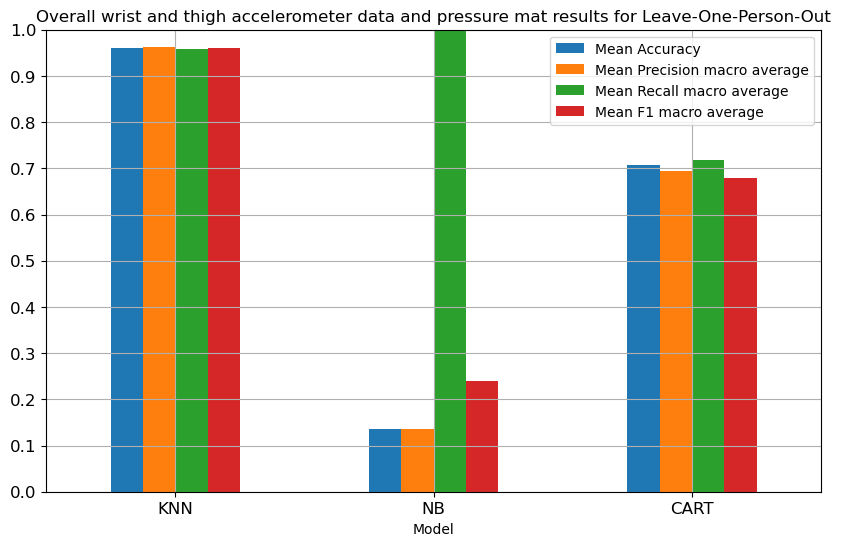

In [35]:
plot_overall_results(wtp_lopo_results, 'Overall wrist and thigh accelerometer data and pressure mat results for Leave-One-Person-Out')